# Prophet model from Facebook to be used for time series forecasting

In [35]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go       
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from fbprophet import Prophet
# from fbprophet.plot import plot_cross_validation_metric

In [8]:
# import data
df = pd.read_csv('04_time_series_prophet_data/DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)
print(df.head())
print(df.info())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.0,25.495521,7.348103,6.000000,18.857143,27.714286,31.305804,38.714286
humidity,1462.0,60.771702,16.769652,13.428571,50.375000,62.625000,72.218750,100.000000
wind_speed,1462.0,6.802209,4.561602,0.000000,3.475000,6.221667,9.238235,42.220000
meanpressure,1462.0,1011.104548,180.231668,-3.041667,1001.580357,1008.563492,1014.944901,7679.333333


<Axes: xlabel='date', ylabel='meantemp'>

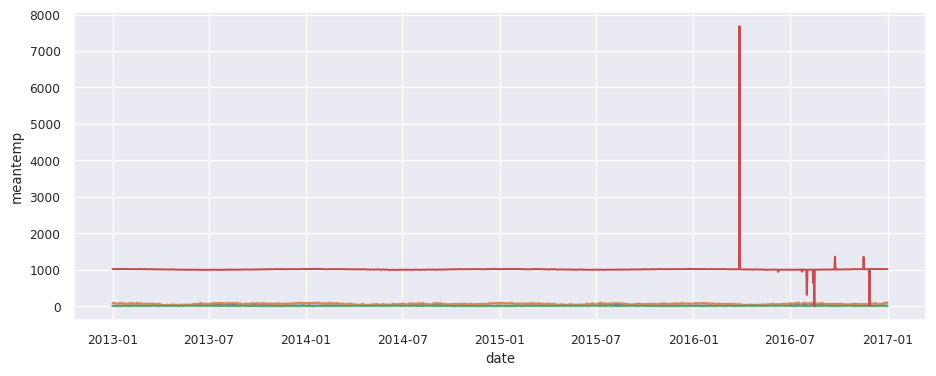

In [40]:
# draw a line plot
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=0.8, style='darkgrid')
sns.lineplot(data=df, x="date", y="meantemp")
sns.lineplot(data=df, x="date", y="humidity")
sns.lineplot(data=df, x="date", y="wind_speed")
sns.lineplot(data=df, x="date", y="meanpressure")

In [45]:
# draw same plot on plotly
fig = px.line(df, x=df.index, y="meanpressure", title='Mean Pressure')
fig.show()

In [44]:
# interpolate the outliers form mean pressure column  on 28.March.2016
df.loc['2016-03-28', 'meanpressure'] = np.nan
df['meanpressure'] = df['meanpressure'].interpolate(method='time')
df.loc['2016-03-28']

meantemp          25.933333
humidity          52.800000
wind_speed         6.546667
meanpressure    1012.062500
Name: 2016-03-28 00:00:00, dtype: float64

In [20]:
# make a scatter plot b/w meantemp and humidity
fig = px.scatter(df, x='meantemp', y='humidity', title='Mean Temperature vs Humidity', trendline='ols', trendline_color_override='red')
fig.show()

In [24]:
# lets check pearson correlation
from scipy.stats import pearsonr
corr, pval = pearsonr(df['meantemp'], df['humidity'])
print(f'Correlation: {corr}')

Correlation: -0.571950715581722


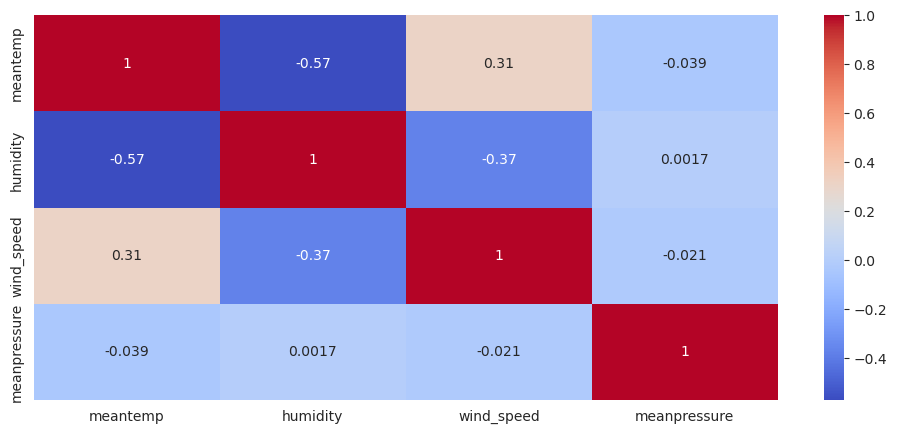

In [32]:
# create a heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [38]:
# let's scale the data 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-5.880689e-16
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-5.628829e+00
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-5.286224e-02
50%,3.020541e-01,1.105528e-01,-1.273107e-01,-1.410365e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,2.131517e-02
max,1.799551e+00,2.340044e+00,7.766988e+00,3.701076e+01


<Axes: >

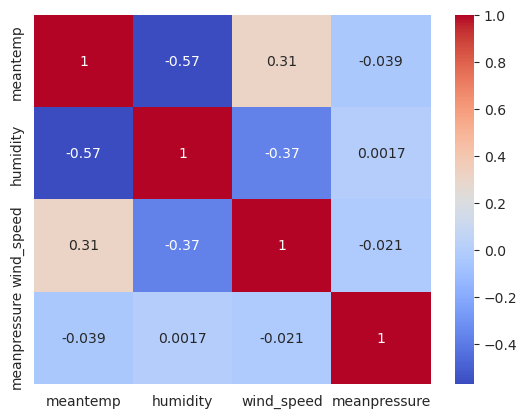

In [39]:
# make a correlation heatmap of scaled data
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm') # we wont see any change in correlation

In [48]:
# Add a column for month and year
df_scaled['month'] = df_scaled.index.month
df_scaled['year'] = df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321,1,2013
2013-01-02,-2.463454,1.862828,-0.838196,0.037162,1,2013
2013-01-03,-2.495219,1.564569,-0.475626,0.041972,1,2013
2013-01-04,-2.291015,0.630022,-1.221233,0.033647,1,2013
2013-01-05,-2.654044,1.554627,-0.680303,0.029946,1,2013


<Axes: xlabel='month', ylabel='meantemp'>

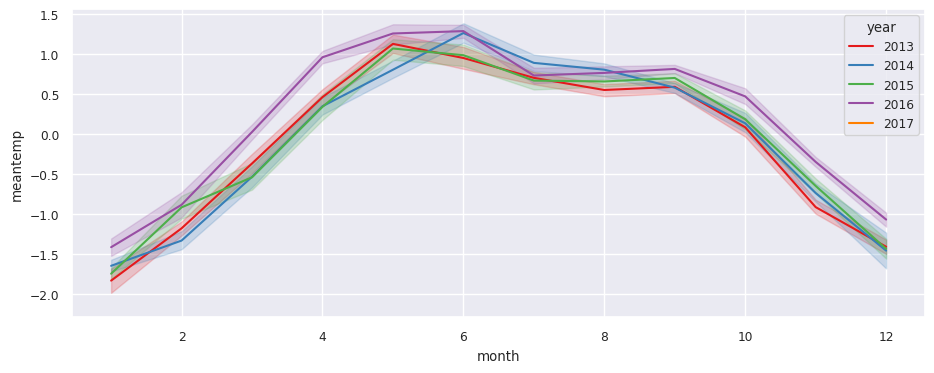

In [53]:
sns.lineplot(data=df_scaled, x="month", y="meantemp", hue='year', palette='Set1')

In [ ]:
# lets use the prophet model from python
